<a href="https://colab.research.google.com/github/duckbillLvr/software-lecture/blob/main/lecture5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
!pip install finterstellar

In [24]:
import finterstellar as fs

### 3. 영업 효율이 좋은 기업, GP/A

> $$GP/A = \frac{매출총이익(Gross Profit)}{총자산}$$

- 싸지만 수익성이 떨어지는 종목을 매수하거나 비싸지만 수익성이 높은 종목을 매도하는 것을 방지할 수 있다.

In [25]:
df = fs.fn_single(otp='16487125231099712210', symbol='LMT', window='T')

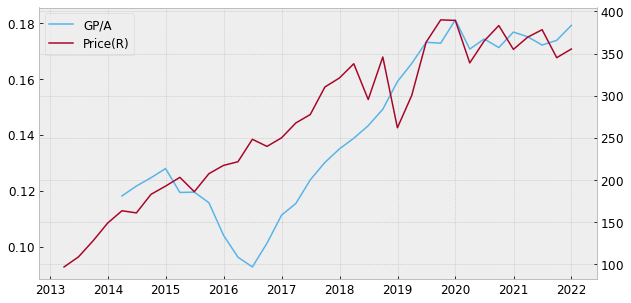

In [26]:
df['Avg Assets'] = (df['Total Assets'] + df['Total Assets'].shift(4)) / 2
df['GP/A'] = df['Gross Profit'] / df['Avg Assets']
fs.draw_chart(df, left='GP/A', right='Price')

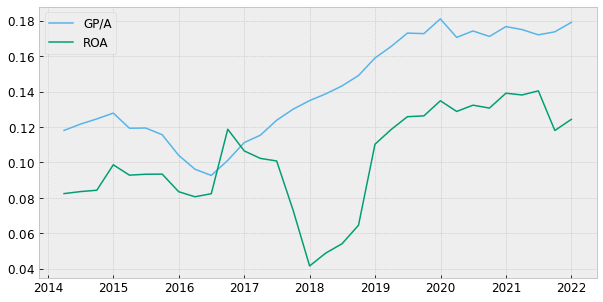

In [27]:
# GP/A 와 ROA 비교
df['ROA'] = df['Net Income'] / df['Avg Assets']
fs.draw_chart(df, left=['GP/A', 'ROA'])

- GP/A 백테스트

In [28]:
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
data = {}
for t in terms:
  data[t] = fs.fn_consolidated(otp='16487125231099712210', term=t)

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK


In [29]:
s, signal = {}, {}
for t in terms:
  prev_t = fs.quarters_before(terms, t, 4)
  data[t]['Avg Assets'] = (data[t]['Total Assets'] + data[prev_t]['Total Assets']) / 2
  data[t]['GP/A'] = data[t]['Gross Profit'] / data[t]['Avg Assets']
  data[t].loc[(data[t]['Gross Profit'] < 0) | (data[t]['Avg Assets'] < 0) | (data[t]['Total Assets'] < 0), 'GP/A'] = float('nan')
  s[t] = fs.fn_filter(data[t], by='GP/A', floor=0, n=30, asc=False)
  signal[t] = list(s[t].index)

df = fs.backtest(signal = signal, data=data, m=3, cost=.001)

CAGR: 14.13%
Accumulated return: 275.53%
Investment period: 10.0yrs
Sharpe ratio: 1.03
MDD: -38.17%


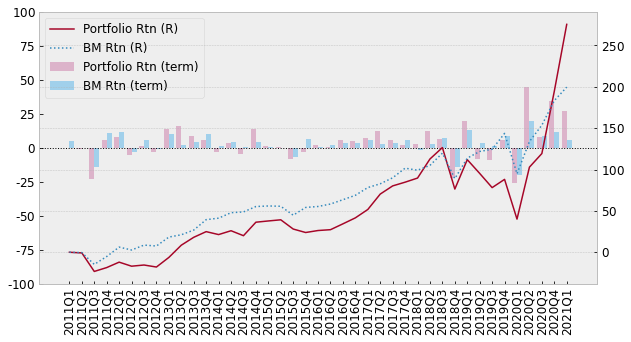

In [30]:
fs.draw_return(df)

- PER 전략 테스트

In [33]:
s = {}
signal = {}
for t in terms:
  data[t]['PER'] = data[t]['Price_M3'] / data[t]['EPS']
  s[t] = fs.fn_filter(data[t], by='PER', floor=1, cap = 10, asc=True)
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 6.31%
Accumulated return: 84.45%
Investment period: 10.0yrs
Sharpe ratio: 0.65
MDD: -14.98%


- PER, GP/A 합성전략 테스트

In [35]:
s, s1, s2, signal = {}, {}, {}, {}
for t in terms:
  #GP/A
  prev_t = fs.quarters_before(terms, t, 4)
  data[t]['Avg Assets'] = (data[t]['Total Assets'] + data[prev_t]['Total Assets']) / 2
  data[t]['GP/A'] = data[t]['Gross Profit'] / data[t]['Avg Assets']
  data[t].loc[(data[t]['Gross Profit'] < 0) | (data[t]['Avg Assets'] < 0) | (data[t]['Total Assets'] < 0), 'GP/A'] = float('nan')
  #PER
  data[t]['PER'] = data[t]['Price_M3'] / data[t]['EPS']
  s1[t] = fs.fn_score(data[t], by='PER', method='relative', floor=1,cap=10, asc=True)
  s2[t] = fs.fn_score(data[t], by='GP/A', method='relative', floor=0, asc=False)
  s[t] = fs.combine_score(s1[t], s2[t], n=30)
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 6.21%
Accumulated return: 82.75%
Investment period: 10.0yrs
Sharpe ratio: 0.28
MDD: -54.95%


In [36]:
# PBR 단독 성과
s = {}
signal = {}
for t in terms:
  data[t]['PBR'] = data[t]['Price_M3'] / (data[t]['Shareholders Equity'] / data[t]['Shares'])
  s[t] = fs.fn_filter(data[t], by='PBR', floor=.1, cap = 1,n=30, asc=True)
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 31.04%
Accumulated return: 1395.90%
Investment period: 10.0yrs
Sharpe ratio: 2.86
MDD: -38.99%


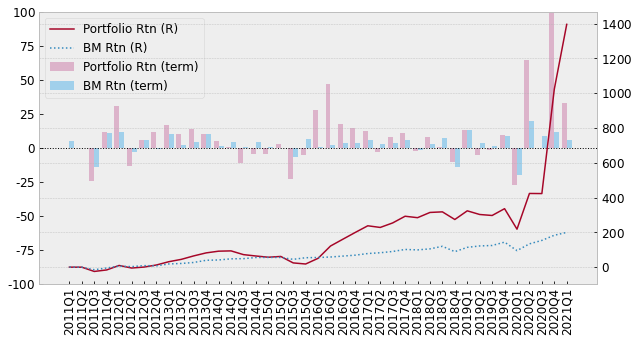

In [37]:
fs.draw_return(df)

In [38]:
# PBR, GP/A 합성 백테스트
s, s1, s2, signal = {}, {}, {}, {}
for t in terms:
  #GP/A
  prev_t = fs.quarters_before(terms, t, 4)
  data[t]['Avg Assets'] = (data[t]['Total Assets'] + data[prev_t]['Total Assets']) / 2
  data[t]['GP/A'] = data[t]['Gross Profit'] / data[t]['Avg Assets']
  data[t].loc[(data[t]['Gross Profit'] < 0) | (data[t]['Avg Assets'] < 0) | (data[t]['Total Assets'] < 0), 'GP/A'] = float('nan')
  #PBR
  data[t]['PBR'] = data[t]['Price_M3'] / (data[t]['Shareholders Equity'] / data[t]['Shares'])
  s1[t] = fs.fn_score(data[t], by='PBR', method='relative', floor=.1,cap=1, asc=True)
  s2[t] = fs.fn_score(data[t], by='GP/A', method='relative', floor=0, asc=False)
  s[t] = fs.combine_score(s1[t], s2[t], n=30)
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 23.41%
Accumulated return: 720.54%
Investment period: 10.0yrs
Sharpe ratio: 1.67
MDD: -48.28%


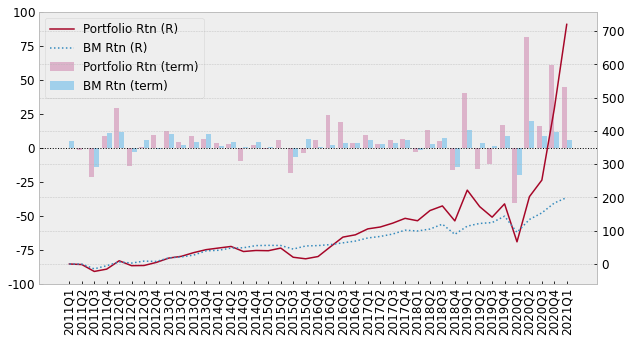

In [39]:
fs.draw_return(df)

### 4. 안정성 지표
- 전체 자산 중 부채가 얼마나 많은지를 따지는 부채비율, 부채 중에서도 차입금비율을 봐야 한다.
- 부채가 많으면 기업은 채권자의 손에 넘어간다.


부채비율이 100이상이라면 부채가 자본보다 많은 것이다.
> $$부채비율 = \frac{총부채(Total\,Liabilities)}{총자본(Shareholders\,Equity)} \times 100$$  


- 부채 비율이 높다고 해서 반드시 나쁜 것은 아니다.
- 차임금은 이자 비용을 발생시켜 기업의 손익에 직접적인 영향을 미친다.


> $$ 차입금비율 = \frac{단기차입임(Current\,Debt) + 장기차입금(Long\,Term,Debt)}{총자본(Shareholders\,Equity)} \times 100$$


In [42]:
# 부채비율과 차입금비율 계산
df = fs.fn_single(otp='16487125231099712210', symbol='UBER', window='T') # 우버의 재무 데이터

In [45]:
df['Liability/Equity'] = df['Total Liabilities'] / df['Shareholders Equity']
df['Debt/Equity'] = (df['Long Term Debt'] + df['Current Debt']) / df['Shareholders Equity']
df[['Liability/Equity', 'Debt/Equity']].tail()

,Liability/Equity,Debt/Equity
2020-12-31,1.59,0.85
2021-03-31,1.51,0.72
2021-06-30,1.45,0.69
2021-09-30,1.62,0.80
2021-12-31,1.62,0.80


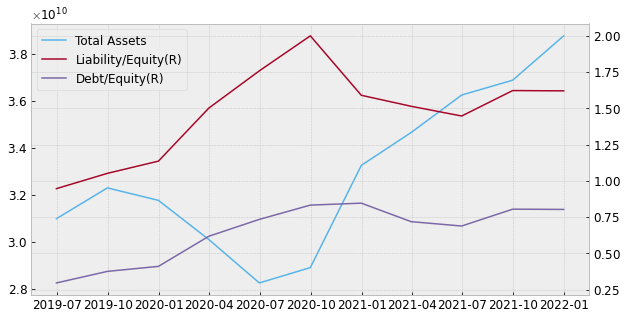

In [46]:
fs.draw_chart(df, left='Total Assets', right=['Liability/Equity', 'Debt/Equity'])

- 부채비율평가: 부채비율은 늘어나고 자산은 줄어드는 형태로 가장 경계해야할 모양의 그래프
- 차입금비율평가 : 역시 2020년 7월 자산이 감소하는면서 부채 비율은 올라가는 형태이다.

In [50]:
# Liability/Equity 백테스팅
s = {}
signal = {}
for t in terms:
  data[t]['Liability/Equity'] = data[t]['Total Liabilities'] / data[t]['Shareholders Equity']
  data[t].loc[(data[t]['Shareholders Equity'] < 0), 'Liability/Equity'] = float('nan')
  s[t] = fs.fn_filter(data[t], by='Liability/Equity', floor=0, n=30, asc=True)
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 4.93%
Accumulated return: 61.90%
Investment period: 10.0yrs
Sharpe ratio: 0.26
MDD: -32.60%


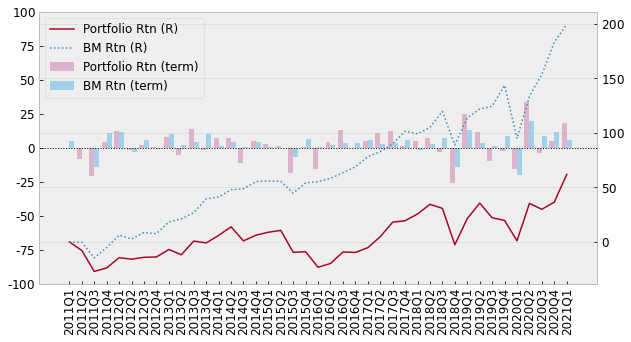

In [51]:
fs.draw_return(df)

In [52]:
# PER + Liability/Equity 백테스팅
s1, s2, s, signal = {}, {}, {}, {}
for t in terms:
  # PER
  data[t]['PER'] = data[t]['Price_M3'] / data[t]['EPS']
  # Liability/Equity
  data[t]['Liability/Equity'] = data[t]['Total Liabilities'] / data[t]['Shareholders Equity']
  data[t].loc[(data[t]['Shareholders Equity'] < 0), 'Liability/Equity'] = float('nan')
  s1[t] = fs.fn_filter(data[t], by='PER', floor=1, cap=10, asc=True)
  s2[t] = fs.fn_filter(data[t], by='Liability/Equity', floor=0, n=1000, asc=True)
  s[t] = fs.combine_signal(s1[t], s2[t], how='and', n=30)
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 0.82%
Accumulated return: 8.52%
Investment period: 10.0yrs
Sharpe ratio: 0.03
MDD: -59.25%


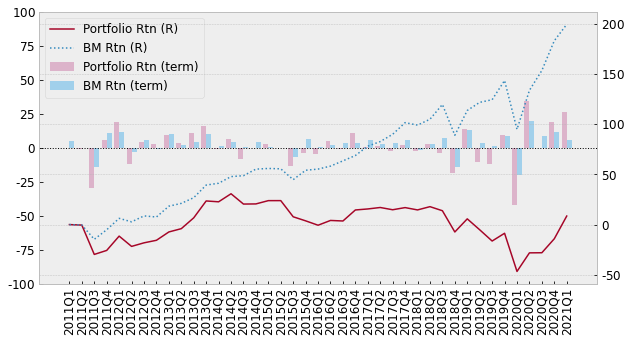

In [53]:
fs.draw_return(df)

In [54]:
# PBR + Liability/Equity 백테스팅
s1, s2, s, signal = {}, {}, {}, {}
for t in terms:
  # PBR
  data[t]['PBR'] = data[t]['Price_M3'] / (data[t]['Shareholders Equity'] / data[t]['Shares'])
  # Liability/Equity
  data[t]['Liability/Equity'] = data[t]['Total Liabilities'] / data[t]['Shareholders Equity']
  data[t].loc[(data[t]['Shareholders Equity'] < 0), 'Liability/Equity'] = float('nan')
  s1[t] = fs.fn_filter(data[t], by='PBR', floor=.1, cap=1, asc=True)
  s2[t] = fs.fn_filter(data[t], by='Liability/Equity', floor=0, n=1000, asc=True)
  s[t] = fs.combine_signal(s1[t], s2[t], how='and', n=30)
  signal[t] = list(s[t].index)

df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 20.03%
Accumulated return: 521.62%
Investment period: 10.0yrs
Sharpe ratio: 1.18
MDD: -46.77%


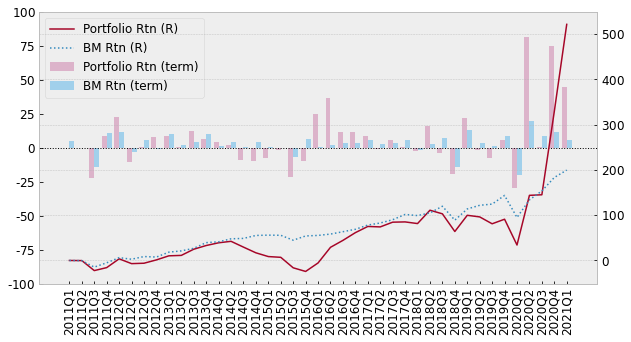

In [55]:
fs.draw_return(df)